In [1]:
import sys
sys.path.append('/opt/code/face/dual_shot')
import numpy as np
import collections
from prepare_data.generator import gen_data
from prepare_data.model_target import init_anchors
from dual_conf import current_config as conf
from prepare_data.generator import image_reader,layer_strides,map_size,e_scale,ratio

Using TensorFlow backend.
/root/anaconda3/envs/keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/envs/keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
gen = gen_data(conf.batch_size, 'train')
print([i.shape for i in next(gen)[0]])
[batch_img, e_reg_targets, e_cls_targets, o_reg_targets, o_cls_targets], []= next(gen)

Error bbox number to filter : 48,  bbox number: 159376
[(4, 640, 640, 3), (4, 34125, 4), (4, 34125), (4, 34125, 4), (4, 34125)]


In [3]:
count = [np.unique(e_cls_targets,return_counts=True) for i in range(len(e_cls_targets)) ]
print(count)

[(array([-1,  0,  1]), array([   256, 136222,     22])), (array([-1,  0,  1]), array([   256, 136222,     22])), (array([-1,  0,  1]), array([   256, 136222,     22])), (array([-1,  0,  1]), array([   256, 136222,     22]))]


## plot augmented image

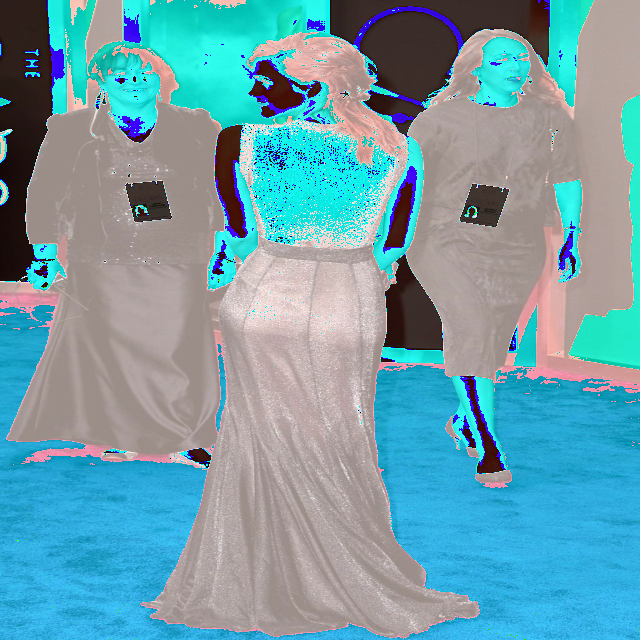

In [4]:
from PIL import Image
Image.fromarray(batch_img[0].astype('uint8'))

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_anchor(img_array, anchor_list):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(img_array.astype(int))
    for a in anchor_list:
        y1,x1,y2,x2 = [int(i) for i in a]
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()

## plot postive anchor

In [6]:
e_anchors = init_anchors(layer_strides, map_size, ratio, e_scale)
e_anchors.shape

(34125, 4)

In [7]:
e_cls_targets = e_cls_targets[0]
e_cls_targets.shape

(34125,)

In [8]:
pos_an_ind = np.where(e_cls_targets==1)
pos_an_ind

(array([32111, 32151, 32168, 32177, 32191, 32216, 32217, 32218, 32231,
        32257]),)

In [9]:
anchor_list = e_anchors[pos_an_ind]
anchor_list

array([[  0.80816412, 477.87210941,  79.19183588, 530.12789059],
       [ 16.80816412, 477.87210941,  95.19183588, 530.12789059],
       [ 32.80816412, 109.87210941, 111.19183588, 162.12789059],
       [ 32.80816412, 253.87210941, 111.19183588, 306.12789059],
       [ 32.80816412, 477.87210941, 111.19183588, 530.12789059],
       [ 48.80816412, 237.87210941, 127.19183588, 290.12789059],
       [ 48.80816412, 253.87210941, 127.19183588, 306.12789059],
       [ 48.80816412, 269.87210941, 127.19183588, 322.12789059],
       [ 48.80816412, 477.87210941, 127.19183588, 530.12789059],
       [ 64.80816412, 253.87210941, 143.19183588, 306.12789059]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


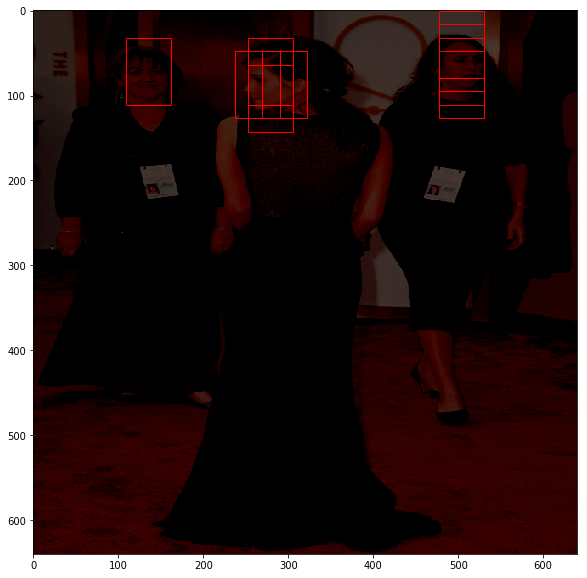

In [10]:
plot_anchor( batch_img[0], anchor_list)

## plot negtive anchor

In [11]:
neg_an_ind  = np.where(e_cls_targets==-1)
neg_an_ind

(array([ 1404,  1729,  1794,  1884,  1957,  1993,  2044,  2047,  2117,
         2265,  2267,  2303,  2314,  2316,  2369,  2372,  2428,  2467,
         2471,  2590,  2595,  2630,  2849,  2953,  3077,  3103,  3117,
         3163,  3165,  3241,  3269,  3273,  3430,  3491,  3549,  3586,
         3590,  3712,  3743,  3917,  3965,  3966,  4035,  4075,  4195,
         4223,  4557,  5034, 26013, 26014, 26018, 26143, 26176, 26599,
        26672, 26698, 26750, 32028, 32056, 32131, 32140, 32174, 32233,
        33704]),)

In [12]:
anchor_list = e_anchors[neg_an_ind]
anchor_list

array([[ 24.20204103, 491.46802735,  43.79795897, 504.53197265],
       [ 32.20204103, 511.46802735,  51.79795897, 524.53197265],
       [ 36.20204103, 131.46802735,  55.79795897, 144.53197265],
       [ 36.20204103, 491.46802735,  55.79795897, 504.53197265],
       [ 40.20204103, 143.46802735,  59.79795897, 156.53197265],
       [ 40.20204103, 287.46802735,  59.79795897, 300.53197265],
       [ 40.20204103, 491.46802735,  59.79795897, 504.53197265],
       [ 40.20204103, 503.46802735,  59.79795897, 516.53197265],
       [ 44.20204103, 143.46802735,  63.79795897, 156.53197265],
       [ 48.20204103,  95.46802735,  67.79795897, 108.53197265],
       [ 48.20204103, 103.46802735,  67.79795897, 116.53197265],
       [ 48.20204103, 247.46802735,  67.79795897, 260.53197265],
       [ 48.20204103, 291.46802735,  67.79795897, 304.53197265],
       [ 48.20204103, 299.46802735,  67.79795897, 312.53197265],
       [ 48.20204103, 511.46802735,  67.79795897, 524.53197265],
       [ 48.20204103, 523

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


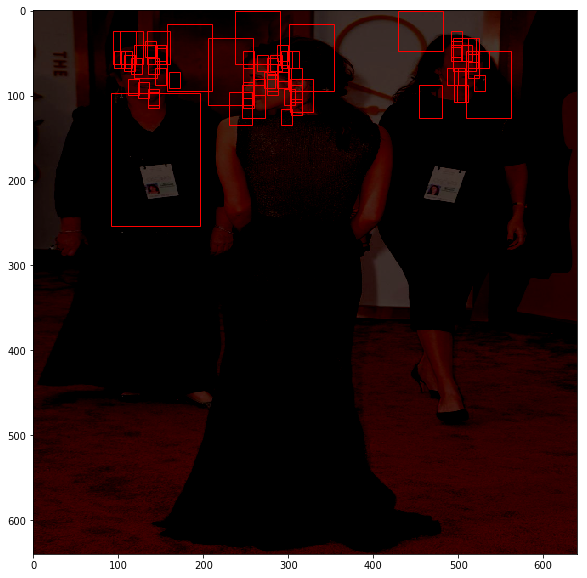

In [13]:
plot_anchor( batch_img[0], anchor_list)